[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/HyperCoast/blob/main/docs/examples/pace.ipynb)

# Visualizing PACE data interactively with HyperCoast

This notebook demonstrates how to visualize [Plankton, Aerosol, Cloud, ocean Ecosystem (PACE)](https://pace.gsfc.nasa.gov) data interactively with HyperCoast.

In [ ]:
# %pip install "hypercoast[extra]"

In [5]:
import hypercoast

Download a sample PACE data file from [here](https://github.com/opengeos/datasets/releases/tag/netcdf).

In [2]:
url = "https://github.com/opengeos/datasets/releases/download/netcdf/PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc"

In [6]:
#filepath = "data/PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc"
filepath = "data/PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc"
hypercoast.download_file(url, filepath)

data/PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc already exists. Skip downloading. Set overwrite=True to overwrite.


'c:\\Users\\C00553090\\DATA\\Hyperspectral\\HyperCoast\\docs\\examples\\data\\PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc'

Let's make a scatter plot of the pixel locations so we can see the irregular spacing. 

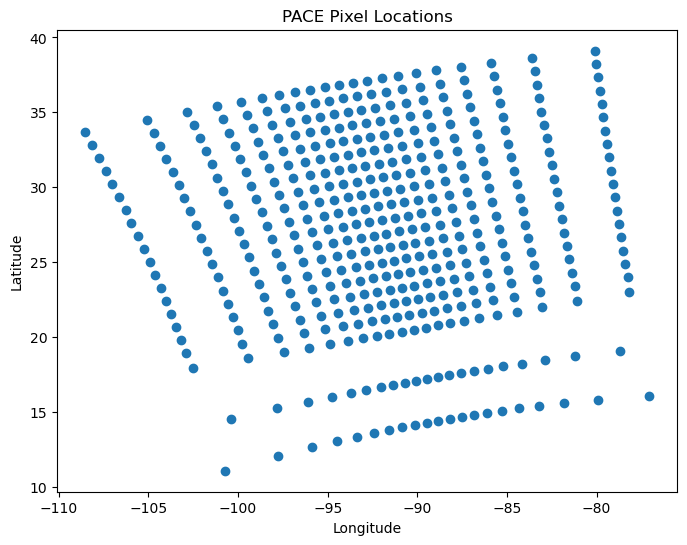

In [7]:
plot = hypercoast.view_pace_pixel_locations(filepath, step=20)

Load the dataset as a `xarray.Dataset` object.

In [9]:
dataset = hypercoast.read_pace(filepath)

Visualize selected bands of the dataset.

In [ ]:
hypercoast.viz_pace(dataset, wavelengths=[500, 510, 520, 530], ncols=2)

Add projection.

In [ ]:
hypercoast.viz_pace(dataset, wavelengths=[500, 510, 520, 530], ncols=2, crs="default")

Plot a spectral signature.

In [ ]:
latitude = 25.493961
longitude = -91.25617
hypercoast.filter_pace(dataset, latitude, longitude, return_plot=True)

Plot multiple spectral signatures.

In [ ]:
latitude = (25.49, 25.50)
longitude = (-92, -91.055)
hypercoast.filter_pace(dataset, latitude, longitude, return_plot=True)

Single-band visualization.

In [ ]:
m = hypercoast.Map()
m.add_basemap("Hybrid")
wavelengths = [450]
m.add_pace(dataset, wavelengths, colormap="jet", vmin=0, vmax=0.02, layer_name="PACE")
m.add_colormap(cmap="jet", vmin=0, vmax=0.02, label="Reflectance")
m.add("spectral")
m

![](https://i.imgur.com/HBMjW6o.gif)

Multiple-band visualization.

In [11]:
m = hypercoast.Map()
m.add_basemap("Hybrid")
wavelengths = [450, 550, 650]
m.add_pace(
    dataset, wavelengths, indexes=[3, 2, 1], vmin=0, vmax=0.02, layer_name="PACE"
)
m.add("spectral")
m

Map(center=[25.194741, -92.490864], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

![](https://i.imgur.com/IJZCBmX.png)